In [1]:
import sys
import csv
import io
import math
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import ordpy
sys.path.append('../bin')
from bin.functions import *
np.seterr(divide = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [39]:
input_file = "../src/M4-methods/Dataset/Train/Yearly-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_y = pd.read_csv(output_file, index_col=0)
df_y

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V827,V828,V829,V830,V831,V832,V833,V834,V835,V836
V1,,,,,,,,,,,,,,,,,,,,,
Y1,5172.1,5133.5,5186.9,5084.6,5182.0,5414.3,5576.2,5752.9,5955.2,6087.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,2070.0,2104.0,2394.0,1651.0,1492.0,1348.0,1198.0,1192.0,1105.0,1008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y3,2760.0,2980.0,3200.0,3450.0,3670.0,3850.0,4000.0,4160.0,4290.0,4530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y4,3380.0,3670.0,3960.0,4190.0,4440.0,4700.0,4890.0,5060.0,5200.0,5490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y5,1980.0,2030.0,2220.0,2530.0,2610.0,2720.0,2970.0,2980.0,3100.0,3230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y22996,470.0,500.0,572.0,572.0,609.0,664.0,795.0,841.0,927.0,951.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y22997,4660.0,4220.0,4790.0,8800.0,10600.0,25720.0,29860.0,23960.0,15220.0,12550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y22998,688.8,462.5,472.4,495.1,450.1,385.9,467.0,633.8,699.0,734.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_y.iloc[0]

V2      5172.1
V3      5133.5
V4      5186.9
V5      5084.6
V6      5182.0
         ...  
V832       NaN
V833       NaN
V834       NaN
V835       NaN
V836       NaN
Name: Y1, Length: 835, dtype: float64

In [ ]:
perm_ent3 = []
perm_ent4 = []
for index, row in df_y.iterrows():
    ts = row.dropna()
    perm_ent3.append(entropy(count_permutation(ts, 3))/math.log2(math.factorial(3)))
    perm_ent4.append(entropy(count_permutation(ts, 4))/math.log2(math.factorial(4)))

df_y["perm_ent3"] = perm_ent3
df_y["perm_ent4"] = perm_ent4

In [50]:

len(perm_ent3)

23000

In [51]:
df_y.shape

(23000, 837)

In [52]:
len(perm_ent4)

23000

In [74]:
df_y[["perm_ent3","perm_ent4"]]

,perm_ent3,perm_ent4
V1,,
Y1,0.697843,0.539401
Y2,0.816579,0.705971
Y3,0.000000,0.000000
Y4,0.166740,0.144179
Y5,0.478736,0.395644
...,...,...
Y22996,0.573126,0.449256
Y22997,0.783529,0.629254
Y22998,0.920599,0.721641


In [57]:
y_test = pd.read_csv("../src/M4-methods/Dataset/Test/Yearly-test.csv", index_col=0)

In [58]:
y_test

,V2,V3,V4,V5,V6,V7
V1,,,,,,
Y1,7290.2,7392.6,7527.6,7594.8,7720.7,7823.2
Y2,1598.0,1366.0,1288.0,1148.0,1139.0,1062.0
Y3,8440.0,8660.0,8780.0,8830.0,8990.0,9230.0
Y4,9540.0,9790.0,9940.0,9940.0,10110.0,10400.0
Y5,6840.0,7420.0,7570.0,8010.0,8240.0,8730.0
...,...,...,...,...,...,...
Y22996,2946.0,3072.0,3387.0,3608.0,3649.0,3594.0
Y22997,2510.0,1640.0,3020.0,4350.0,1810.0,2310.0
Y22998,708.6,1049.2,1542.8,2390.3,2108.4,2283.3


In [9]:
y_pred = pd.read_csv("../src/M4-methods/Point Forecasts/submission-118/submission-118.csv", index_col=0)
y_pred

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48
id,,,,,,,,,,,,,,,,,,,,,
Y1,7243.994000,7288.752000,7333.678000,7376.056000,7423.142000,7472.488000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,1651.078000,1670.146000,1698.032000,1719.692000,1742.954000,1752.746000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y3,8569.504000,8763.972000,8967.934000,9176.056000,9392.288000,9610.704000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y4,9883.298000,10098.840000,10319.780000,10550.380000,10781.400000,11015.780000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y5,7078.450000,7285.262000,7498.822000,7721.528000,7954.338000,8186.344000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H410,46.499812,40.118288,42.782863,32.730025,33.637900,46.674013,109.356625,182.557875,168.696500,120.775000,...,151.774500,155.661000,183.706875,163.907375,140.089500,121.087250,119.109375,127.629250,144.652750,158.518375
H411,24.323013,24.171163,24.783288,25.461513,33.410562,72.930312,155.383375,245.272500,204.296750,133.695250,...,132.093875,154.740375,146.296500,113.675750,104.711625,68.926225,56.112713,49.731325,39.136137,45.265012
H412,27.054913,24.378113,20.294963,20.865488,19.285538,22.483563,55.315787,109.856125,101.299125,82.250137,...,99.593350,107.257875,100.535313,98.381850,82.207325,68.603325,58.123063,64.434825,50.713500,40.054862


In [65]:
mse = []
mape = []
for index, row in y_test.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    mse.append(mean_squared_error(row.dropna(), y_pred.loc[index].dropna()))
    mape.append(mean_absolute_percentage_error(row.dropna(), y_pred.loc[index].dropna()))


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [66]:
df_y["mse"] = mse
df_y["mape"] = mape

In [75]:
df_res = df_y[["perm_ent3", "perm_ent4", "mse","mape"]]


In [76]:
df_res.to_csv("year_res.csv")

In [80]:
df_y.drop(["perm_ent3", "perm_ent4", "mse","mape"],axis=1, inplace=True)

In [81]:
df_y

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V827,V828,V829,V830,V831,V832,V833,V834,V835,V836
V1,,,,,,,,,,,,,,,,,,,,,
Y1,5172.1,5133.5,5186.9,5084.6,5182.0,5414.3,5576.2,5752.9,5955.2,6087.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,2070.0,2104.0,2394.0,1651.0,1492.0,1348.0,1198.0,1192.0,1105.0,1008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y3,2760.0,2980.0,3200.0,3450.0,3670.0,3850.0,4000.0,4160.0,4290.0,4530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y4,3380.0,3670.0,3960.0,4190.0,4440.0,4700.0,4890.0,5060.0,5200.0,5490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y5,1980.0,2030.0,2220.0,2530.0,2610.0,2720.0,2970.0,2980.0,3100.0,3230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y22996,470.0,500.0,572.0,572.0,609.0,664.0,795.0,841.0,927.0,951.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y22997,4660.0,4220.0,4790.0,8800.0,10600.0,25720.0,29860.0,23960.0,15220.0,12550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y22998,688.8,462.5,472.4,495.1,450.1,385.9,467.0,633.8,699.0,734.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
sym = []
for index, row in df_y.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    sym.append(sum(multiply_equals_test(count_permutation(row.dropna(),4))[0]) == 0)
df_res["sym_test"] = sym

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

C:\Users\vitya\AppData\Local\Temp\ipykernel_10008\623402977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res["sym_test"] = sym


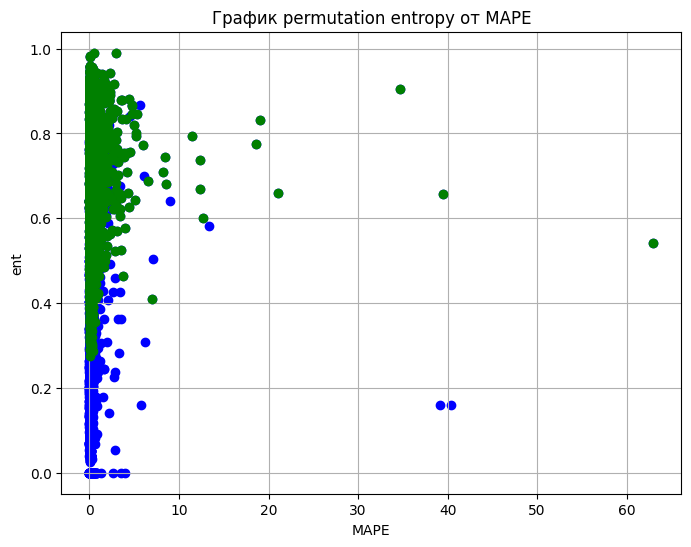

In [88]:
df_sorted = df_res.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

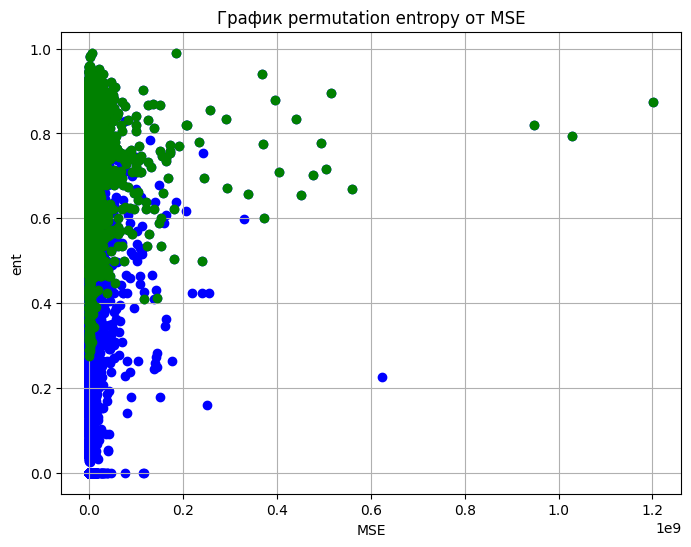

In [91]:
df_sorted = df_res.sort_values(by='mse', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mse'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mse'], df_sorted["perm_ent3"], color='blue')
plt.title('График permutation entropy от MSE')
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [92]:
df_res

,perm_ent3,perm_ent4,mse,mape,sym_test
V1,,,,,
Y1,0.697843,0.539401,5.165229e+04,0.026386,False
Y2,0.816579,0.705971,2.386951e+05,0.375479,False
Y3,0.000000,0.000000,8.157110e+04,0.028990,False
Y4,0.166740,0.144179,2.599992e+05,0.048794,False
Y5,0.478736,0.395644,9.007663e+04,0.032563,False
...,...,...,...,...,...
Y22996,0.573126,0.449256,7.026910e+06,0.774407,False
Y22997,0.783529,0.629254,1.140939e+07,1.495124,True
Y22998,0.920599,0.721641,5.865997e+05,0.351883,True


In [93]:
df_res.to_csv("year_res.csv")

In [94]:
input_file = "../src/M4-methods/Dataset/Train/Quarterly-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_q = pd.read_csv(output_file, index_col=0)
df_q

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V858,V859,V860,V861,V862,V863,V864,V865,V866,V867
V1,,,,,,,,,,,,,,,,,,,,,
Q1,7407.412314,7528.566074,7374.709225,7395.514848,7654.007989,7686.847835,7578.190743,7904.376716,7744.049254,7889.909013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q2,7552.454619,7541.774571,7466.568336,7550.333354,8067.131522,8063.701017,7901.029312,8155.387316,8031.010328,8023.240005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q3,8463.842193,8366.102309,8269.502192,8256.985325,8726.917647,8733.243591,8664.260087,8717.394568,8662.139727,8629.101896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q4,8498.941194,8409.926442,8391.441381,8292.860310,8798.521118,8753.990355,8740.062556,8695.540651,8627.447488,8525.993424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q5,1835.000000,2322.000000,3059.000000,1883.000000,1896.000000,2060.000000,2764.000000,1743.000000,1561.000000,1934.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q23996,2400.000000,2370.000000,2310.000000,2370.000000,2420.000000,2420.000000,2310.000000,2340.000000,2370.000000,2370.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q23997,6920.000000,6790.000000,6790.000000,6900.000000,6900.000000,7000.000000,6770.000000,6770.000000,6880.000000,6760.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q23998,6920.000000,6790.000000,6790.000000,6900.000000,6900.000000,7000.000000,6770.000000,6770.000000,6880.000000,6760.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
perm_ent4 = []
for index, row in df_q.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    ts = row.dropna()
    perm_ent4.append(entropy(count_permutation(ts, 4))/math.log2(math.factorial(4)))

df_q["perm_ent4"] = perm_ent4

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [96]:
y_test = pd.read_csv("../src/M4-methods/Dataset/Test/Quarterly-test.csv", index_col=0)
mse = []
mape = []
for index, row in y_test.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    mse.append(mean_squared_error(row.dropna(), y_pred.loc[index].dropna()))
    mape.append(mean_absolute_percentage_error(row.dropna(), y_pred.loc[index].dropna()))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [98]:
df_q["mse"] = mse
df_q["mape"] = mape
df_qres = df_q[["perm_ent4", "mse","mape"]]
df_q.drop(["perm_ent4", "mse","mape"],axis=1, inplace=True)
sym = []
for index, row in df_q.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    sym.append(sum(multiply_equals_test(count_permutation(row.dropna(),4))[0]) == 0)
df_qres["sym_test"] = sym

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

C:\Users\vitya\AppData\Local\Temp\ipykernel_10008\4021579997.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qres["sym_test"] = sym


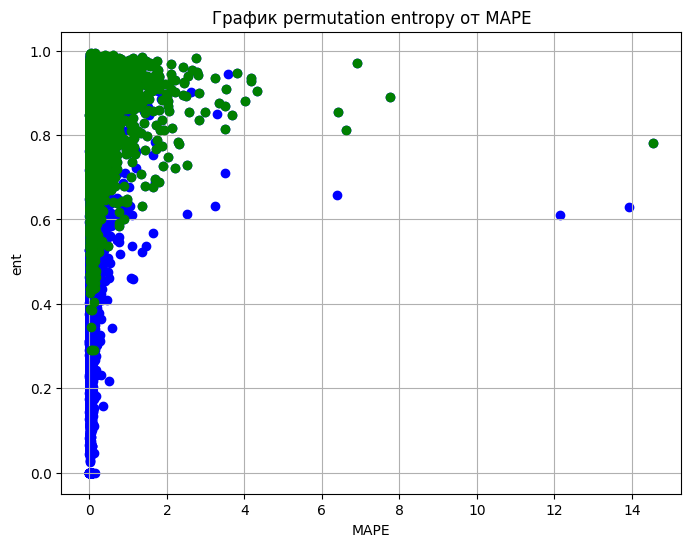

In [99]:
df_sorted = df_qres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

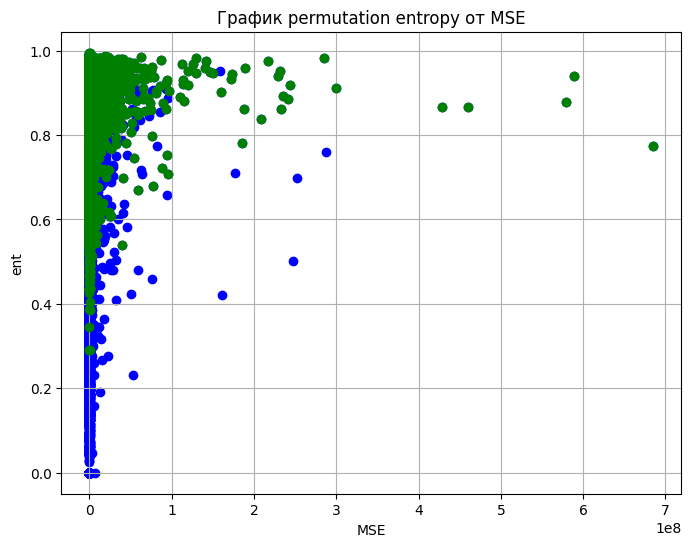

In [100]:
df_sorted = df_qres.sort_values(by='mse', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mse'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mse'], df_sorted["perm_ent3"], color='blue')
plt.title('График permutation entropy от MSE')
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [101]:
df_qres.to_csv("quart_res.csv")

In [2]:
input_file = "../src/M4-methods/Dataset/Train/Monthly-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_m = pd.read_csv(output_file, index_col=0)
df_m

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V2786,V2787,V2788,V2789,V2790,V2791,V2792,V2793,V2794,V2795
V1,,,,,,,,,,,,,,,,,,,,,
M1,8000.0,8350.0,8570.0,7700.0,7080.0,6520.0,6070.0,6650.0,6830.0,5710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M2,2440.0,2490.0,2710.0,2290.0,1960.0,1990.0,1960.0,2530.0,2640.0,2650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M3,2670.0,2590.0,2784.0,2816.0,2888.0,2906.0,2839.0,2860.0,2798.0,2795.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M4,7264.0,7215.0,7022.0,7040.0,6966.0,6984.0,7025.0,7082.0,6956.0,7014.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M5,4210.0,4290.0,4250.0,4320.0,4320.0,4330.0,4320.0,4260.0,4220.0,4260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M47996,9964.0,7212.0,7858.0,8493.0,8203.0,8362.0,7238.0,7357.0,8642.0,8833.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M47997,1696.6,1627.2,1465.4,1672.8,1760.1,1974.8,1733.7,1898.0,1952.4,1684.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M47998,5900.0,6000.0,6280.0,6100.0,5410.0,5320.0,5130.0,5330.0,5810.0,5840.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
perm_ent4 = []
for index, row in df_m.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    ts = row.dropna()
    perm_ent4.append(entropy(count_permutation(ts, 4))/math.log2(math.factorial(4)))

df_m["perm_ent4"] = perm_ent4

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

KeyboardInterrupt: 

In [4]:
len(perm_ent4)

28404

In [5]:
npar = np.array(perm_ent4)
np.savetxt('entM.txt', npar)

In [6]:
for index, row in df_m.iloc[len(perm_ent4):].iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    ts = row.dropna()
    perm_ent4.append(entropy(count_permutation(ts, 4))/math.log2(math.factorial(4)))

df_m["perm_ent4"] = perm_ent4

28500
28600
28700
28800
28900
29000
29100
29200
29300
29400
29500
29600
29700
29800
29900
30000
30100
30200
30300
30400
30500
30600
30700
30800
30900
31000
31100
31200
31300
31400
31500
31600
31700
31800
31900
32000
32100
32200
32300
32400
32500
32600
32700
32800
32900
33000
33100
33200
33300
33400
33500
33600
33700
33800
33900
34000
34100
34200
34300
34400
34500
34600
34700
34800
34900
35000
35100
35200
35300
35400
35500
35600
35700
35800
35900
36000
36100
36200
36300
36400
36500
36600
36700
36800
36900
37000
37100
37200
37300
37400
37500
37600
37700
37800
37900
38000
38100
38200
38300
38400
38500
38600
38700
38800
38900
39000
39100
39200
39300
39400
39500
39600
39700
39800
39900
40000
40100
40200
40300
40400
40500
40600
40700
40800
40900
41000
41100
41200
41300
41400
41500
41600
41700
41800
41900
42000
42100
42200
42300
42400
42500
42600
42700
42800
42900
43000
43100
43200
43300
43400
43500
43600
43700
43800
43900
44000
44100
44200
44300
44400
44500
44600
44700
44800
44900
45000
4510

In [10]:
y_test = pd.read_csv("../src/M4-methods/Dataset/Test/Monthly-test.csv", index_col=0)
mse = []
mape = []
for index, row in y_test.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    mse.append(mean_squared_error(row.dropna(), y_pred.loc[index].dropna()))
    mape.append(mean_absolute_percentage_error(row.dropna(), y_pred.loc[index].dropna()))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [12]:
df_m["mse"] = mse
df_m["mape"] = mape
df_mres = df_m[["perm_ent4", "mse","mape"]]
df_m.drop(["perm_ent4", "mse","mape"],axis=1, inplace=True)
sym = []
for index, row in df_m.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    sym.append(sum(multiply_equals_test(count_permutation(row.dropna(),4))[0]) == 0)
df_mres["sym_test"] = sym

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400


KeyboardInterrupt: 

In [14]:
for index, row in df_m[len(sym):].iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    sym.append(sum(multiply_equals_test(count_permutation(row.dropna(),4))[0]) == 0)
df_mres["sym_test"] = sym

25400
25500
25600
25700
25800
25900
26000
26100
26200
26300
26400
26500
26600
26700
26800
26900
27000
27100
27200
27300
27400
27500
27600
27700
27800
27900
28000
28100
28200
28300
28400
28500
28600
28700
28800
28900
29000
29100
29200
29300
29400
29500
29600
29700
29800
29900
30000
30100
30200
30300
30400
30500
30600
30700
30800
30900
31000
31100
31200
31300
31400
31500
31600
31700
31800
31900
32000
32100
32200
32300
32400
32500
32600
32700
32800
32900
33000
33100
33200
33300
33400
33500
33600
33700
33800
33900
34000
34100
34200
34300
34400
34500
34600
34700
34800
34900
35000
35100
35200
35300
35400
35500
35600
35700
35800
35900
36000
36100
36200
36300
36400
36500
36600
36700
36800
36900
37000
37100
37200
37300
37400
37500
37600
37700
37800
37900
38000
38100
38200
38300
38400
38500
38600
38700
38800
38900
39000
39100
39200
39300
39400
39500
39600
39700
39800
39900
40000
40100
40200
40300
40400
40500
40600
40700
40800
40900
41000
41100
41200
41300
41400
41500
41600
41700
41800
41900
4200

C:\Users\vitya\AppData\Local\Temp\ipykernel_3040\3162642301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mres["sym_test"] = sym


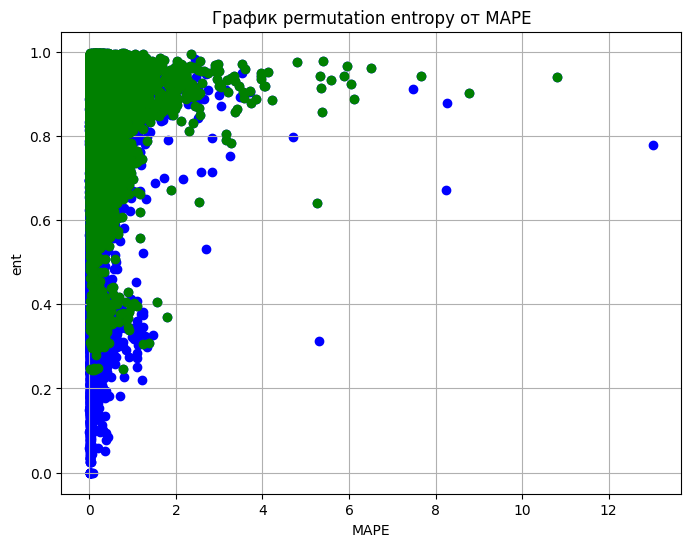

In [15]:
df_sorted = df_mres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

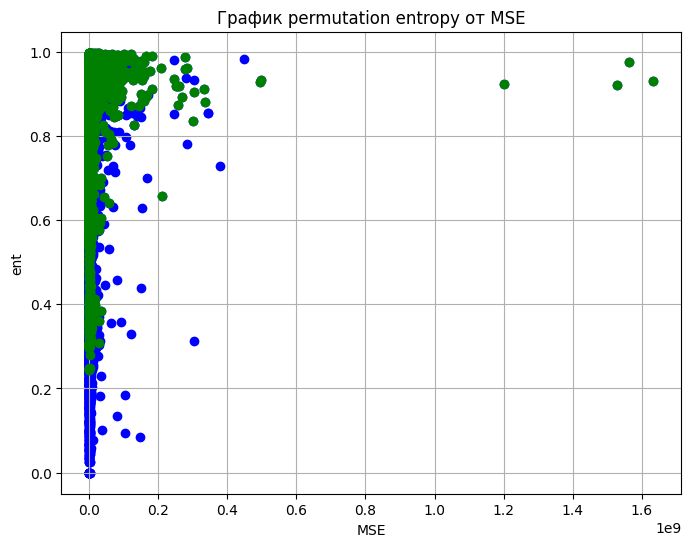

In [16]:
df_sorted = df_mres.sort_values(by='mse', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mse'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mse'], df_sorted["perm_ent3"], color='blue')
plt.title('График permutation entropy от MSE')
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [17]:
df_mres.to_csv("month_res.csv")

In [18]:
input_file = "../src/M4-methods/Dataset/Train/Weekly-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_w = pd.read_csv(output_file, index_col=0)
df_w

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V2589,V2590,V2591,V2592,V2593,V2594,V2595,V2596,V2597,V2598
V1,,,,,,,,,,,,,,,,,,,,,
W1,1089.200,1078.910,1079.88,1063.580,1060.61,1056.930,1056.630,1049.510,1049.320,1049.890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W2,195.928,194.796,192.71,190.288,188.77,187.043,187.353,186.808,186.721,188.039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W3,258.700,259.800,260.20,260.800,261.10,263.100,264.500,266.300,267.200,269.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W4,3460.000,3340.000,2770.00,2520.000,2740.00,2760.000,2470.000,2480.000,3260.000,2400.000,...,2315.35,2195.23,2170.14,2156.88,2177.15,1932.91,2056.49,1984.55,2004.56,2385.81
W5,4696.000,4765.000,4144.00,3945.000,4733.00,4330.000,5046.000,3898.000,4568.000,5242.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W355,4798.000,5192.000,4194.00,4217.000,3926.00,3987.000,3541.000,4068.000,3953.000,3538.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W356,4923.000,6382.000,4387.00,4979.000,4660.00,4437.000,4125.000,4781.000,4702.000,3841.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W357,4401.000,4955.000,3680.00,4214.000,4139.00,3384.000,3712.000,4077.000,4204.000,3339.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
perm_ent4 = []
for index, row in df_w.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    ts = row.dropna()
    perm_ent4.append(entropy(count_permutation(ts, 4))/math.log2(math.factorial(4)))

df_w["perm_ent4"] = perm_ent4

100
200
300


In [20]:
y_test = pd.read_csv("../src/M4-methods/Dataset/Test/Weekly-test.csv", index_col=0)
mse = []
mape = []
for index, row in y_test.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    mse.append(mean_squared_error(row.dropna(), y_pred.loc[index].dropna()))
    mape.append(mean_absolute_percentage_error(row.dropna(), y_pred.loc[index].dropna()))

100
200
300


In [21]:
df_w["mse"] = mse
df_w["mape"] = mape
df_wres = df_w[["perm_ent4", "mse","mape"]]
df_w.drop(["perm_ent4", "mse","mape"],axis=1, inplace=True)
sym = []
for index, row in df_w.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    sym.append(sum(multiply_equals_test(count_permutation(row.dropna(),4))[0]) == 0)
df_wres["sym_test"] = sym

100
200
300


C:\Users\vitya\AppData\Local\Temp\ipykernel_3040\1658341061.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wres["sym_test"] = sym


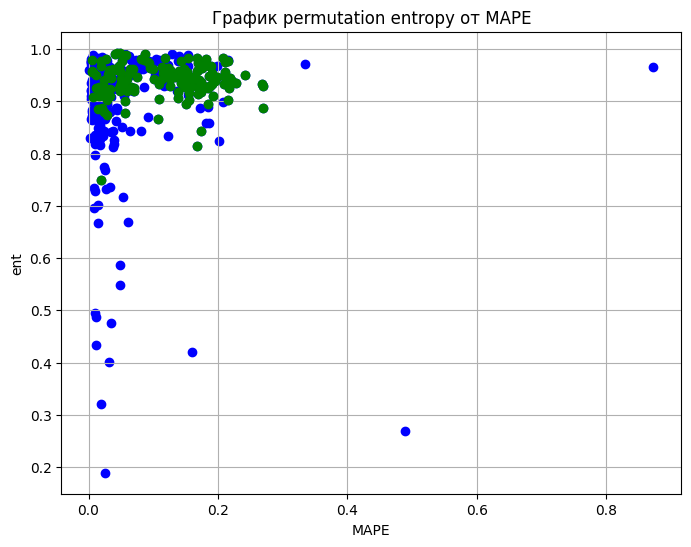

In [22]:
df_sorted = df_wres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

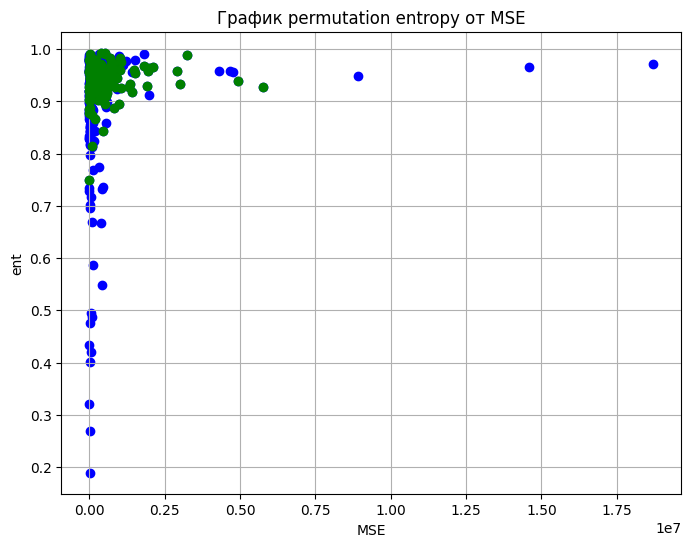

In [23]:
df_sorted = df_wres.sort_values(by='mse', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mse'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mse'], df_sorted["perm_ent3"], color='blue')
plt.title('График permutation entropy от MSE')
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [24]:
df_wres.to_csv("week_res.csv")

In [25]:
input_file = "../src/M4-methods/Dataset/Train/Daily-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_d = pd.read_csv(output_file, index_col=0)
df_d

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
V1,,,,,,,,,,,,,,,,,,,,,
D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.40,1021.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D2,2793.70,2793.80,2803.70,2805.80,2802.30,2795.00,2806.40,2782.20,2780.30,2781.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D3,1091.30,1088.50,1085.70,1082.90,1080.10,1077.30,1074.50,1071.70,1068.90,1066.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4,1092.00,1078.00,1064.00,1050.00,1036.00,1022.00,1008.00,1092.00,1078.00,1064.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D5,2938.63,2956.44,2964.41,2972.41,3014.97,3014.23,3024.08,3031.97,3062.70,3057.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4223,10000.00,3230.00,3238.00,3234.00,3225.00,3209.00,3207.00,3203.00,3204.00,3172.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4224,10000.00,3997.00,4000.00,3973.00,3963.00,3984.00,3956.00,3896.00,3869.00,3859.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4225,352000.00,4186.00,4171.00,4196.00,4184.00,4192.00,4192.00,4178.00,4146.00,4153.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
perm_ent4 = []
for index, row in df_d.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    ts = row.dropna()
    perm_ent4.append(entropy(count_permutation(ts, 4))/math.log2(math.factorial(4)))

df_d["perm_ent4"] = perm_ent4

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


In [27]:
for index, row in df_d[len(perm_ent4):].iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    ts = row.dropna()
    perm_ent4.append(entropy(count_permutation(ts, 4))/math.log2(math.factorial(4)))

df_d["perm_ent4"] = perm_ent4

In [28]:
y_test = pd.read_csv("../src/M4-methods/Dataset/Test/Daily-test.csv", index_col=0)
mse = []
mape = []
for index, row in y_test.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    mse.append(mean_squared_error(row.dropna(), y_pred.loc[index].dropna()))
    mape.append(mean_absolute_percentage_error(row.dropna(), y_pred.loc[index].dropna()))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200


In [ ]:
df_d["mse"] = mse
df_d["mape"] = mape
df_dres = df_d[["perm_ent4", "mse","mape"]]
df_d.drop(["perm_ent4", "mse","mape"],axis=1, inplace=True)
sym = []
for index, row in df_d.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    sym.append(sum(multiply_equals_test(count_permutation(row.dropna(),4))[0]) == 0)
df_dres["sym_test"] = sym

100
200
300
400
500
600
700
800
900


KeyboardInterrupt: 

In [33]:
for index, row in df_d[len(sym):].iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    sym.append(sum(multiply_equals_test(count_permutation(row.dropna(),4))[0]) == 0)
df_dres["sym_test"] = sym

C:\Users\vitya\AppData\Local\Temp\ipykernel_3040\2659691662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dres["sym_test"] = sym


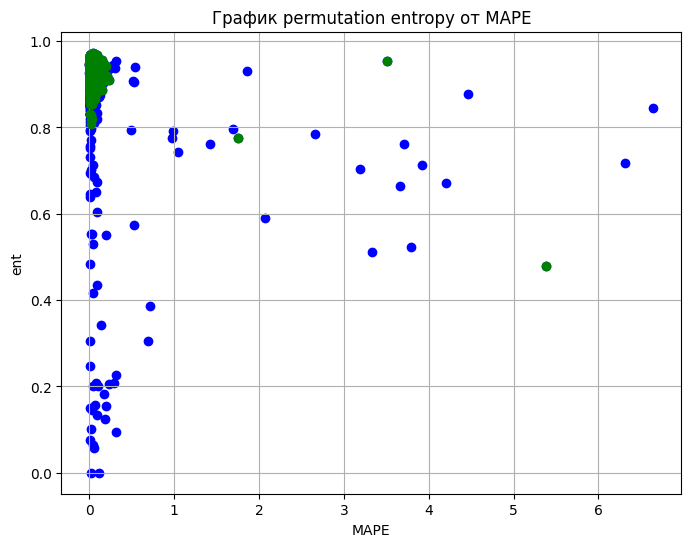

In [34]:
df_sorted = df_dres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

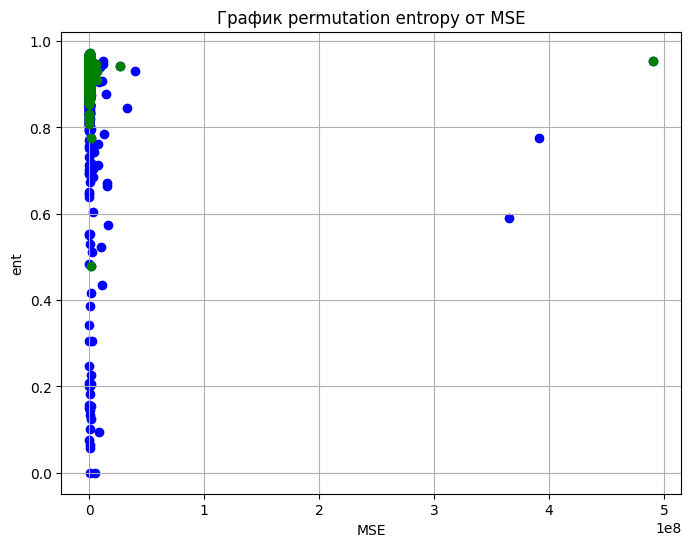

In [35]:
df_sorted = df_dres.sort_values(by='mse', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mse'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mse'], df_sorted["perm_ent3"], color='blue')
plt.title('График permutation entropy от MSE')
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [36]:
df_dres.to_csv("day_res.csv")

In [37]:
input_file = "../src/M4-methods/Dataset/Train/Hourly-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_h = pd.read_csv(output_file, index_col=0)
df_h

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
V1,,,,,,,,,,,,,,,,,,,,,
H1,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,1713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H3,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,1108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H4,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,4227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H5,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,2275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H410,153.0,196.0,163.0,131.0,82.0,53.0,57.0,54.0,46.0,72.0,...,132.0,165.0,191.0,186.0,119.0,108.0,70.0,72.0,79.0,77.0
H411,24.0,30.0,22.0,14.0,19.0,20.0,24.0,45.0,38.0,60.0,...,122.0,195.0,166.0,154.0,132.0,76.0,66.0,67.0,51.0,42.0
H412,19.0,30.0,12.0,16.0,13.0,15.0,15.0,21.0,21.0,29.0,...,111.0,166.0,225.0,278.0,144.0,71.0,70.0,73.0,39.0,36.0


In [38]:
perm_ent4 = []
for index, row in df_h.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    ts = row.dropna()
    perm_ent4.append(entropy(count_permutation(ts, 4))/math.log2(math.factorial(4)))

df_h["perm_ent4"] = perm_ent4

100
200
300
400


In [39]:
y_test = pd.read_csv("../src/M4-methods/Dataset/Test/Hourly-test.csv", index_col=0)
mse = []
mape = []
for index, row in y_test.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    mse.append(mean_squared_error(row.dropna(), y_pred.loc[index].dropna()))
    mape.append(mean_absolute_percentage_error(row.dropna(), y_pred.loc[index].dropna()))

100
200
300
400


In [40]:
df_h["mse"] = mse
df_h["mape"] = mape
df_hres = df_h[["perm_ent4", "mse","mape"]]
df_h.drop(["perm_ent4", "mse","mape"],axis=1, inplace=True)
sym = []
for index, row in df_h.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    sym.append(sum(multiply_equals_test(count_permutation(row.dropna(),4))[0]) == 0)
df_hres["sym_test"] = sym

100
200
300
400


C:\Users\vitya\AppData\Local\Temp\ipykernel_3040\2848739121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hres["sym_test"] = sym


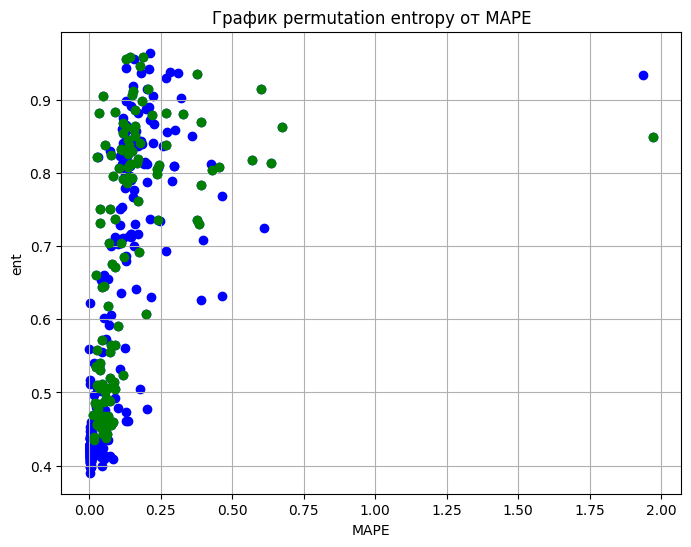

In [41]:
df_sorted = df_hres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

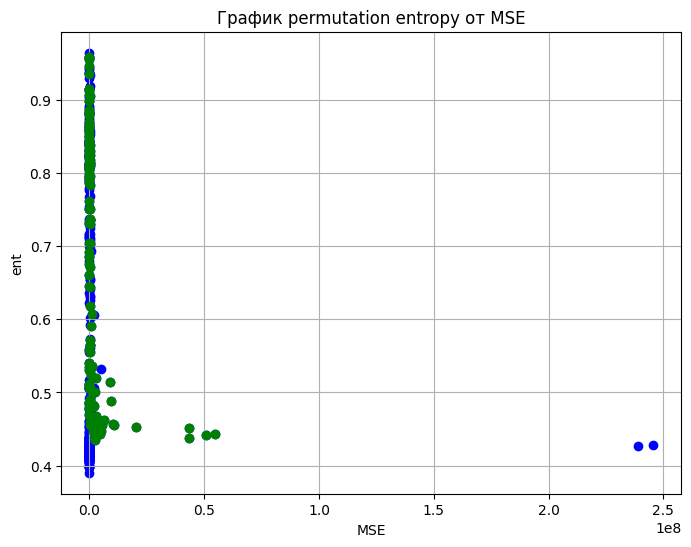

In [42]:
df_sorted = df_hres.sort_values(by='mse', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mse'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mse'], df_sorted["perm_ent3"], color='blue')
plt.title('График permutation entropy от MSE')
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [43]:
df_hres.to_csv("hour_res.csv")

In [7]:
import os

def find_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

In [8]:
# Директория, в которой мы ищем CSV файлы
directory = "../src/M4-methods/Point Forecasts/"

# Находим все CSV файлы в директории и ее подпапках
csv_files = find_csv_files(directory)



In [4]:
csv_files

['../src/M4-methods/Point Forecasts/submission-005\\submission-005.csv',
 '../src/M4-methods/Point Forecasts/submission-009\\submission-009.csv',
 '../src/M4-methods/Point Forecasts/submission-024\\submission-024.csv',
 '../src/M4-methods/Point Forecasts/submission-030\\submission-030.csv',
 '../src/M4-methods/Point Forecasts/submission-036\\submission-036.csv',
 '../src/M4-methods/Point Forecasts/submission-039\\submission-039.csv',
 '../src/M4-methods/Point Forecasts/submission-043\\submission-043.csv',
 '../src/M4-methods/Point Forecasts/submission-069\\submission-069.csv',
 '../src/M4-methods/Point Forecasts/submission-070\\submission-070.csv',
 '../src/M4-methods/Point Forecasts/submission-072\\submission-072.csv',
 '../src/M4-methods/Point Forecasts/submission-078\\submission-078.csv',
 '../src/M4-methods/Point Forecasts/submission-082\\submission-082.csv',
 '../src/M4-methods/Point Forecasts/submission-091\\submission-091.csv',
 '../src/M4-methods/Point Forecasts/submission-104\

In [22]:
df = pd.read_csv(csv_files[0], index_col=0)
df.tail(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48
id,,,,,,,,,,,,,,,,,,,,,
H405,31.175123,17.290694,13.584369,15.520173,23.546049,38.237033,70.433820,109.471811,126.702293,134.710063,...,224.589576,318.844835,377.598189,342.840812,217.404112,151.640363,125.268971,95.486541,69.057483,43.541718
H406,24.392746,17.835715,14.517049,16.359463,17.863390,30.025571,65.295803,88.558866,99.282322,87.758439,...,116.130018,129.519875,143.377113,164.296634,102.517165,77.242032,61.405616,55.812513,51.124889,33.120468
H407,93.863551,48.371428,34.203965,27.078116,26.629952,73.871493,293.521812,546.722799,548.405331,420.016894,...,683.748161,898.931353,1039.916027,1000.886043,662.282589,459.233812,379.400959,306.788802,229.493549,159.498242
H408,42.282250,34.064109,35.996255,46.478057,57.432851,80.597620,121.545216,173.304494,220.755418,269.438484,...,299.486920,282.589187,271.639539,241.669350,200.098534,152.873825,120.531071,92.910134,73.955333,51.408182
H409,28.548255,19.650683,15.117169,14.946599,16.013998,24.121994,39.128276,79.031018,83.869177,76.632838,...,110.426324,167.810848,211.638719,207.380447,133.593923,89.877228,72.299199,60.597244,48.599378,33.298635
H410,56.206275,47.004186,44.527169,34.221309,33.034179,41.996902,98.168230,152.875834,137.052833,111.415105,...,135.967070,148.126331,181.815788,181.457423,121.740284,91.785652,79.953969,75.428790,89.124874,76.924661
H411,26.843371,19.748512,18.902259,18.921546,26.834222,47.738035,105.887698,160.190571,128.828340,99.486156,...,112.853318,136.329931,127.205802,111.180438,90.643639,63.192870,53.644470,47.756857,41.647842,46.856975
H412,26.103861,19.817695,17.439260,18.553153,16.928068,20.854713,45.388462,82.995963,86.951063,76.554756,...,108.451790,141.269211,191.566592,221.984761,118.979468,78.005109,65.526638,56.460270,42.713807,36.314243
H413,32.409813,27.057127,26.065718,23.039188,22.042792,22.266553,23.894791,25.560158,27.726902,28.781561,...,80.505929,81.781181,82.857467,79.839465,81.360793,72.599159,63.500021,51.430507,45.637900,38.156368


In [5]:
df_testD = pd.read_csv("../src/M4-methods/Dataset/Test/Daily-test.csv", index_col=0)
df_testH = pd.read_csv("../src/M4-methods/Dataset/Test/Hourly-test.csv", index_col=0)
df_testM = pd.read_csv("../src/M4-methods/Dataset/Test/Monthly-test.csv", index_col=0)
df_testQ = pd.read_csv("../src/M4-methods/Dataset/Test/Quarterly-test.csv", index_col=0)
df_testW = pd.read_csv("../src/M4-methods/Dataset/Test/Weekly-test.csv", index_col=0)
df_testY = pd.read_csv("../src/M4-methods/Dataset/Test/Yearly-test.csv", index_col=0)
y_test = pd.concat([df_testY,df_testW, df_testQ, df_testM, df_testH, df_testD],)
y_test

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49
V1,,,,,,,,,,,,,,,,,,,,,
Y1,7290.20,7392.60,7527.60,7594.80,7720.70,7823.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,1598.00,1366.00,1288.00,1148.00,1139.00,1062.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y3,8440.00,8660.00,8780.00,8830.00,8990.00,9230.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y4,9540.00,9790.00,9940.00,9940.00,10110.00,10400.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y5,6840.00,7420.00,7570.00,8010.00,8240.00,8730.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4223,3050.00,3125.00,3262.00,3262.00,3520.00,3520.00,3515.00,3494.00,3494.0,3494.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4224,3719.00,3754.00,3754.00,3721.00,3730.00,3727.00,3700.00,3700.00,3708.0,3708.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4225,4014.00,4023.00,4056.00,4070.00,4085.00,4095.00,4118.00,4110.00,4159.0,4167.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_resD = pd.read_csv("day_res.csv")
df_resH = pd.read_csv("hour_res.csv")
df_resM = pd.read_csv("month_res.csv")
df_resQ = pd.read_csv("quart_res.csv")
df_resW = pd.read_csv("week_res.csv")
df_resY = pd.read_csv("year_res.csv")
df_res = pd.concat([df_resY, df_resW, df_resQ, df_resM, df_resH, df_resD])
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test
0,Y1,0.697843,0.539401,51652.291911,0.026386,False
1,Y2,0.816579,0.705971,238695.086320,0.375479,False
2,Y3,0.000000,0.000000,81571.096142,0.028990,False
3,Y4,0.166740,0.144179,259999.203934,0.048794,False
4,Y5,0.478736,0.395644,90076.626365,0.032563,False
...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,213943.488073,0.125382,True
4223,D4224,NaN,0.933608,15554.137393,0.033118,True
4224,D4225,NaN,0.910326,14580.748412,0.026548,False
4225,D4226,NaN,0.946536,255.318936,0.010125,True


In [7]:
df_res.loc[df_res["V1"] == "D4223", "mse"]

4222    213943.488073
Name: mse, dtype: float64

In [8]:
for csv_name in csv_files:
    df_pred = pd.read_csv(csv_name, index_col=0)
    print(csv_name)
    for index, row in y_test.iterrows():
        if int(index[1:])%100 == 0:
            print(int(index[1:]))
        mse = mean_squared_error(row.dropna(), df_pred.loc[index].dropna())
        if mse < df_res[df_res["V1"] == index]["mse"].values:
            df_res.loc[df_res["V1"] == index, "mse"] = mse
        mape = mean_absolute_percentage_error(row.dropna(), df_pred.loc[index].dropna())
        if mape < df_res[df_res["V1"] == index]["mape"].values:
            df_res.loc[df_res["V1"] == index, "mape"] = mape


../src/M4-methods/Point Forecasts/submission-005\submission-005.csv
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17

In [9]:
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test
0,Y1,0.697843,0.539401,4993.838193,0.009190,False
1,Y2,0.816579,0.705971,12899.948420,0.084814,False
2,Y3,0.000000,0.000000,3476.611770,0.005390,False
3,Y4,0.166740,0.144179,16100.535285,0.010972,False
4,Y5,0.478736,0.395644,10617.608987,0.010394,False
...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,33883.253502,0.051424,True
4223,D4224,NaN,0.933608,1112.812688,0.007694,True
4224,D4225,NaN,0.910326,1858.370496,0.007457,False
4225,D4226,NaN,0.946536,27.140520,0.003027,True


In [11]:
w_perm_ent4 = []
for index, row in y_test.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    ts = row.dropna()
    w_perm_ent4.append(ordpy.weighted_permutation_entropy(ts, 4, normalized = True))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700


C:\Users\vitya\Analis\predan\venv\lib\site-packages\ordpy\ordpy.py:2132: RuntimeWarning: invalid value encountered in divide
  probs = total_variance_per_symbol/total_variance_per_symbol.sum()


3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600
18700
18800
18900
19000
19100
19200
19300
19400
19500
19600
19700
19800
19900
20000
20100
20200
20300
20400
20500
20600
20700
20800
20900
21000
21100
21200
21300
21400


In [12]:
df_res["w_perm_ent4"] = w_perm_ent4

In [13]:
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4
0,Y1,0.697843,0.539401,4993.838193,0.009190,False,-0.000000
1,Y2,0.816579,0.705971,12899.948420,0.084814,False,-0.000000
2,Y3,0.000000,0.000000,3476.611770,0.005390,False,-0.000000
3,Y4,0.166740,0.144179,16100.535285,0.010972,False,-0.000000
4,Y5,0.478736,0.395644,10617.608987,0.010394,False,-0.000000
...,...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,33883.253502,0.051424,True,0.175517
4223,D4224,NaN,0.933608,1112.812688,0.007694,True,0.572596
4224,D4225,NaN,0.910326,1858.370496,0.007457,False,0.552355
4225,D4226,NaN,0.946536,27.140520,0.003027,True,0.666145


In [14]:
df_res.to_csv("all_result.csv")

In [4]:
df_res = pd.read_csv("all_result.csv", index_col=0)
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4,smape,mase
0,Y1,0.697843,0.539401,4993.838193,0.009190,False,-0.000000,0.009146,0.600416
1,Y2,0.816579,0.705971,12899.948420,0.084814,False,-0.000000,0.088896,0.552155
2,Y3,0.000000,0.000000,3476.611770,0.005390,False,-0.000000,0.005387,0.254877
3,Y4,0.166740,0.144179,16100.535285,0.010972,False,-0.000000,0.010918,0.510635
4,Y5,0.478736,0.395644,10617.608987,0.010394,False,-0.000000,0.010289,0.436703
...,...,...,...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,33883.253502,0.051424,True,0.175517,0.052152,3.794788
4223,D4224,NaN,0.933608,1112.812688,0.007694,True,0.572596,0.007734,0.500734
4224,D4225,NaN,0.910326,1858.370496,0.007457,False,0.552355,0.007506,0.022866
4225,D4226,NaN,0.946536,27.140520,0.003027,True,0.666145,0.003028,0.340748


In [17]:
df_res["smape"] = df_res["mse"]*10000
df_res["mase"] = df_res["smape"]


In [18]:
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4,smape,mase
0,Y1,0.697843,0.539401,4993.838193,0.009190,False,-0.000000,4.993838e+07,4.993838e+07
1,Y2,0.816579,0.705971,12899.948420,0.084814,False,-0.000000,1.289995e+08,1.289995e+08
2,Y3,0.000000,0.000000,3476.611770,0.005390,False,-0.000000,3.476612e+07,3.476612e+07
3,Y4,0.166740,0.144179,16100.535285,0.010972,False,-0.000000,1.610054e+08,1.610054e+08
4,Y5,0.478736,0.395644,10617.608987,0.010394,False,-0.000000,1.061761e+08,1.061761e+08
...,...,...,...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,33883.253502,0.051424,True,0.175517,3.388325e+08,3.388325e+08
4223,D4224,NaN,0.933608,1112.812688,0.007694,True,0.572596,1.112813e+07,1.112813e+07
4224,D4225,NaN,0.910326,1858.370496,0.007457,False,0.552355,1.858370e+07,1.858370e+07
4225,D4226,NaN,0.946536,27.140520,0.003027,True,0.666145,2.714052e+05,2.714052e+05


In [5]:
ts_info = pd.read_csv("../src/M4-methods/Dataset/M4-info.csv",index_col=0)
ts_info

,category,Frequency,Horizon,SP,StartingDate
M4id,,,,,
Y1,Macro,1,6,Yearly,01-01-79 12:00
Y2,Macro,1,6,Yearly,01-01-79 12:00
Y3,Macro,1,6,Yearly,01-01-79 12:00
Y4,Macro,1,6,Yearly,01-01-79 12:00
Y5,Macro,1,6,Yearly,01-01-79 12:00
...,...,...,...,...,...
H410,Other,24,48,Hourly,01-01-17 12:00
H411,Other,24,48,Hourly,01-01-17 12:00
H412,Other,24,48,Hourly,01-01-17 12:00


In [33]:
def smape(a, b):
    """
    Calculates sMAPE

    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()


def mase(insample, y_test, y_hat_test, freq):
    """
    Calculates MAsE

    :param insample: insample data
    :param y_test: out of sample target values
    :param y_hat_test: predicted values
    :param freq: data frequency
    :return:
    """
    y_hat_naive = []
    for i in range(freq, len(insample)):
        y_hat_naive.append(insample[(i - freq)])

    masep = np.mean(abs(insample[freq:] - y_hat_naive))

    return np.mean(abs(y_test - y_hat_test)) / masep

In [2]:
input_file = "../src/M4-methods/Dataset/Train/Daily-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_trainD = pd.read_csv(output_file, index_col=0)
input_file = "../src/M4-methods/Dataset/Train/Hourly-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
f = open(output_file, "w")
f.write(st)
f.close()
df_trainH = pd.read_csv(output_file, index_col=0)
with open("../src/M4-methods/Dataset/Train/Monthly-train.csv", 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
f = open(output_file, "w")
f.write(st)
f.close()
df_trainM = pd.read_csv(output_file, index_col=0)
with open("../src/M4-methods/Dataset/Train/Quarterly-train.csv", 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
f = open(output_file, "w")
f.write(st)
f.close()
df_trainQ = pd.read_csv(output_file, index_col=0)
with open("../src/M4-methods/Dataset/Train/Weekly-train.csv", 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
f = open(output_file, "w")
f.write(st)
f.close()
df_trainW = pd.read_csv(output_file, index_col=0)
with open("../src/M4-methods/Dataset/Train/Yearly-train.csv", 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
f = open(output_file, "w")
f.write(st)
f.close()
df_trainY = pd.read_csv(output_file, index_col=0)


In [14]:
df_trainY

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V827,V828,V829,V830,V831,V832,V833,V834,V835,V836
V1,,,,,,,,,,,,,,,,,,,,,
Y1,5172.1,5133.5,5186.9,5084.6,5182.0,5414.3,5576.2,5752.9,5955.2,6087.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,2070.0,2104.0,2394.0,1651.0,1492.0,1348.0,1198.0,1192.0,1105.0,1008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y3,2760.0,2980.0,3200.0,3450.0,3670.0,3850.0,4000.0,4160.0,4290.0,4530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y4,3380.0,3670.0,3960.0,4190.0,4440.0,4700.0,4890.0,5060.0,5200.0,5490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y5,1980.0,2030.0,2220.0,2530.0,2610.0,2720.0,2970.0,2980.0,3100.0,3230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y22996,470.0,500.0,572.0,572.0,609.0,664.0,795.0,841.0,927.0,951.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y22997,4660.0,4220.0,4790.0,8800.0,10600.0,25720.0,29860.0,23960.0,15220.0,12550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y22998,688.8,462.5,472.4,495.1,450.1,385.9,467.0,633.8,699.0,734.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_testD = pd.read_csv("../src/M4-methods/Dataset/Test/Daily-test.csv", index_col=0)
df_testH = pd.read_csv("../src/M4-methods/Dataset/Test/Hourly-test.csv", index_col=0)
df_testM = pd.read_csv("../src/M4-methods/Dataset/Test/Monthly-test.csv", index_col=0)
df_testQ = pd.read_csv("../src/M4-methods/Dataset/Test/Quarterly-test.csv", index_col=0)
df_testW = pd.read_csv("../src/M4-methods/Dataset/Test/Weekly-test.csv", index_col=0)
df_testY = pd.read_csv("../src/M4-methods/Dataset/Test/Yearly-test.csv", index_col=0)
y_test = pd.concat([df_testY,df_testW, df_testQ, df_testM, df_testH, df_testD])
y_test

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49
V1,,,,,,,,,,,,,,,,,,,,,
Y1,7290.20,7392.60,7527.60,7594.80,7720.70,7823.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,1598.00,1366.00,1288.00,1148.00,1139.00,1062.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y3,8440.00,8660.00,8780.00,8830.00,8990.00,9230.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y4,9540.00,9790.00,9940.00,9940.00,10110.00,10400.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y5,6840.00,7420.00,7570.00,8010.00,8240.00,8730.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4223,3050.00,3125.00,3262.00,3262.00,3520.00,3520.00,3515.00,3494.00,3494.0,3494.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4224,3719.00,3754.00,3754.00,3721.00,3730.00,3727.00,3700.00,3700.00,3708.0,3708.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4225,4014.00,4023.00,4056.00,4070.00,4085.00,4095.00,4118.00,4110.00,4159.0,4167.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_pred = pd.read_csv(csv_files[0], index_col=0)
df_pred.loc["Y10"].dropna()


F1    2336.718885
F2    2342.986031
F3    2349.253178
F4    2355.520325
F5    2361.787471
F6    2368.054618
Name: Y10, dtype: float64

In [35]:
train_names = {"Y" : df_trainY, "Q": df_trainQ, "M": df_trainM, "W": df_trainW, "D": df_trainD, "H": df_trainH}
for csv_name in csv_files:
    df_pred = pd.read_csv(csv_name, index_col=0)
    print(csv_name)
    for index, row in y_test.iterrows():
        if int(index[1:])%1000 == 0:
            print(int(index[1:]))
        smape_value = smape(row.dropna().tolist(), df_pred.loc[index].dropna().tolist())
        if smape_value < df_res[df_res["V1"] == index]["smape"].values:
            df_res.loc[df_res["V1"] == index, "smape"] = smape_value

        mase_value = mase(train_names[index[0]].loc[index].dropna().values, row.dropna().values, df_pred.loc[index].dropna().values, ts_info["Frequency"].loc[index])
        if mase_value < df_res[df_res["V1"] == index]["mase"].values:
            df_res.loc[df_res["V1"] == index, "mase"] = mase_value

../src/M4-methods/Point Forecasts/submission-005\submission-005.csv
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
1000
2000
3000
4000
../src/M4-methods/Point Forecasts/submission-009\submission-009.csv
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
1000
2000
3000
4000
5000
6000
7000
80

In [36]:
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4,smape,mase
0,Y1,0.697843,0.539401,4993.838193,0.009190,False,-0.000000,0.009146,0.600416
1,Y2,0.816579,0.705971,12899.948420,0.084814,False,-0.000000,0.088896,0.552155
2,Y3,0.000000,0.000000,3476.611770,0.005390,False,-0.000000,0.005387,0.254877
3,Y4,0.166740,0.144179,16100.535285,0.010972,False,-0.000000,0.010918,0.510635
4,Y5,0.478736,0.395644,10617.608987,0.010394,False,-0.000000,0.010289,0.436703
...,...,...,...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,33883.253502,0.051424,True,0.175517,0.052152,3.794788
4223,D4224,NaN,0.933608,1112.812688,0.007694,True,0.572596,0.007734,0.500734
4224,D4225,NaN,0.910326,1858.370496,0.007457,False,0.552355,0.007506,0.022866
4225,D4226,NaN,0.946536,27.140520,0.003027,True,0.666145,0.003028,0.340748


In [37]:
df_res.to_csv("all_result.csv")

In [7]:
train_names = [df_trainY, df_trainQ, df_trainM, df_trainW, df_trainD, df_trainH]

In [6]:
df_res["max_diff"] = df_res["mse"]*1000000
df_res["amplitude"] = df_res["max_diff"]

In [8]:
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4,smape,mase,max_diff,amplitude
0,Y1,0.697843,0.539401,4993.838193,0.009190,False,-0.000000,0.009146,0.600416,4.993838e+09,4.993838e+09
1,Y2,0.816579,0.705971,12899.948420,0.084814,False,-0.000000,0.088896,0.552155,1.289995e+10,1.289995e+10
2,Y3,0.000000,0.000000,3476.611770,0.005390,False,-0.000000,0.005387,0.254877,3.476612e+09,3.476612e+09
3,Y4,0.166740,0.144179,16100.535285,0.010972,False,-0.000000,0.010918,0.510635,1.610054e+10,1.610054e+10
4,Y5,0.478736,0.395644,10617.608987,0.010394,False,-0.000000,0.010289,0.436703,1.061761e+10,1.061761e+10
...,...,...,...,...,...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,33883.253502,0.051424,True,0.175517,0.052152,3.794788,3.388325e+10,3.388325e+10
4223,D4224,NaN,0.933608,1112.812688,0.007694,True,0.572596,0.007734,0.500734,1.112813e+09,1.112813e+09
4224,D4225,NaN,0.910326,1858.370496,0.007457,False,0.552355,0.007506,0.022866,1.858370e+09,1.858370e+09
4225,D4226,NaN,0.946536,27.140520,0.003027,True,0.666145,0.003028,0.340748,2.714052e+07,2.714052e+07


In [15]:
max(df_trainY.loc["Y1"].diff().dropna())

232.30000000000018

In [16]:
for train_df in train_names:
    for index, row in train_df.iterrows():
        if int(index[1:])%1000 == 0:
            print(int(index[1:]))
        df_res.loc[df_res["V1"] == index, "max_diff"] = max(row.diff().dropna())
        #df_res.loc[df_res["V1"] == index, "amplitude"] = max(row)-min(row)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
1000
2000
3000
4000


In [17]:
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4,smape,mase,max_diff,amplitude
0,Y1,0.697843,0.539401,4993.838193,0.009190,False,-0.000000,0.009146,0.600416,232.30,2566.80
1,Y2,0.816579,0.705971,12899.948420,0.084814,False,-0.000000,0.088896,0.552155,599.00,1533.00
2,Y3,0.000000,0.000000,3476.611770,0.005390,False,-0.000000,0.005387,0.254877,320.00,5620.00
3,Y4,0.166740,0.144179,16100.535285,0.010972,False,-0.000000,0.010918,0.510635,440.00,6290.00
4,Y5,0.478736,0.395644,10617.608987,0.010394,False,-0.000000,0.010289,0.436703,590.00,4860.00
...,...,...,...,...,...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,33883.253502,0.051424,True,0.175517,0.052152,3.794788,86.00,7097.00
4223,D4224,NaN,0.933608,1112.812688,0.007694,True,0.572596,0.007734,0.500734,195.00,6417.00
4224,D4225,NaN,0.910326,1858.370496,0.007457,False,0.552355,0.007506,0.022866,238.00,348148.00
4225,D4226,NaN,0.946536,27.140520,0.003027,True,0.666145,0.003028,0.340748,282.71,3823.38


In [18]:
df_res.to_csv("all_result.csv")